# Auswertung der Rohdaten

Ergebnisse der Umfrage zum Klimaneutralen Stromsystem / Erneuerbaren Energiesystem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


Bad key text.latex.preview in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\

In [2]:
# Einstellungen zur Darstellung
# Farbpalette (kann später mit eigenen Farben angepasst werden)
# https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
cmap = cm.get_cmap('viridis')

In [3]:
# Gruppierung der Ergebnisse
links = ['E-Mailverteiler', 'internes-Netzwerk', 'Pressemitteilung']
states = ['vollständig']#, 'abgebrochen']
# Für Grafiken
nrows = len(states)
ncols = len(links)

In [4]:
# Laden der Umfrageergebnisse
# Funktion zum Bereinigen der Ergebnisse
def cleanse(df):
    mask = (df['duration']>0) \
        & (df['lastpage']>0) \
        & (df['dispcode'].isin([31,32,33,34,22]))
    return df.loc[mask]

# Funktion zum Laden, Filtern und Bereinigen der Daten
def load_df(link, skipped):
    df = pd.read_csv('data/2022_06_RLI_Klimaneutrales Stromsystem_{}_Ergebnisse.csv'.format(link),
                     sep=';', header=2, usecols=list(range(3,123)))
    df = cleanse(df)
    skip_codes = [22] if skipped else [31,32,33,34]
    return df.loc[df['dispcode'].isin(skip_codes)]

# Tabelle mit Datentabellen
data = pd.DataFrame(data={link: [load_df(link, skip) for skip in range(len(states))]
                          for link in links},
                    index=states)

# Access a DataFrame with df.loc[<vollständig/abgebrochen>, <Umfragelink-typ>]

In [5]:
# Importiere Codebook in dict format
from src import rls_umfrage_auswertung
codebook = rls_umfrage_auswertung.main_preprocessing_codebook()

{4: {'columns': ['v_129', 'v_130', 'v_131'],
     'question': 'Welche drei zentralen Eigenschaften beschreiben aus Deiner '
                 'Sicht das „Klimaneutrale Stromsystem“? (q_47502 - Typ 143)'},
 5: {'question': 'Begriffe sind manchmal nicht eindeutig definiert. Auf das '
                 'klimaneutrale Stromsystem gibt es verschiedene Sichtweisen. '
                 'Was trifft aus Deiner Sicht zu?„Klimaneutrales Stromsystem“ '
                 'und „Erneuerbares Stromsystem“? sind ein Synonym. (q_47505 - '
                 'Typ 111)',
     'subquestion': {1: {'columns': 'v_137',
                         'multiple-choice-options': {'1': 'Ja',
                                                     '2': 'Eher ja',
                                                     '3': 'Eher nein',
                                                     '4': 'Nein'},
                         'question': 'Synonyme KS & ES'}}},
 6: {'columns': 'v_138',
     'question': 'Was ist der Unterschied zwisc

In [6]:
# Codes, die Bedeuten, dass keine Angabe gemacht wurde
exclude_codes = [-77, -99, -66, 0, '0', '-66', '-99', '-77']

In [11]:
# Funktion zum Plotten von pie plots
def pie_plots(code, title=None, sub=1):
    key = codebook[code]['subquestion'][sub]['columns']
    codes = codebook[code]['subquestion'][sub]['multiple-choice-options']
    fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols,4*nrows))
    for i in range(nrows):
        for j in range(ncols):
            axis = ax[i,j] if nrows>1 else ax[j]
            data.iloc[i,j][key] = data.iloc[i,j][key].astype(str).replace(codes)
            data.iloc[i,j].loc[~data.iloc[i,j][key].isin(exclude_codes)
                              ].groupby(key).count()['dispcode'].plot.pie(ax=axis, cmap=cmap)
            axis.set_title(links[j] + '; ' + states[i])
    if not title:
        title = codebook[code]['question'][:min(len(codebook[code]['question']), 120)] \
            + '\n' + codebook[code]['subquestion'][sub]['question']
    fig.suptitle(str(title), fontsize=16)

In [8]:
# Funktion zum printen
# agg ist die aggregator function
def print_data(key, agg, title=None, codes=None, gap=False):
    if title:
        print(str(title))
        if gap: print('')
    for l in links:
        for s in states:
            if codes:
                data.loc[s,l][key] = data.loc[s,l][key].astype(str).replace(codes)
            if agg == list:
                result = list(data.loc[s,l].loc[~data.loc[s,l][key].isin(exclude_codes), key])
            else:
                result = data.loc[s,l].loc[~data.loc[s,l][key].isin(exclude_codes), key].agg(agg)
            print('{}; {}: {}'.format(l,s, result))
            if gap: print('')

## Generelle Angaben zu den Ergebnisgruppen

In [9]:
print('Anzahl der Antworten je Gruppe')
for l in links:
    for s in states:
        print('{}; {}: {}'.format(l,s,len(data.loc[s,l])))

Anzahl der Antworten je Gruppe
E-Mailverteiler; vollständig: 64
internes-Netzwerk; vollständig: 36
Pressemitteilung; vollständig: 31


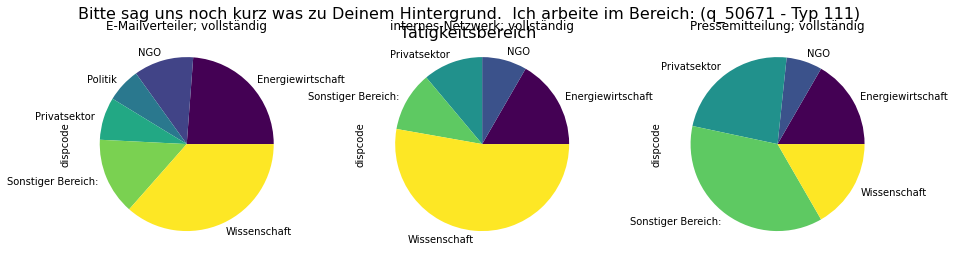

In [13]:
pie_plots(40)

In [14]:
print_data('v_306', np.mean, title='Durchschnittliche Jahre der Erfahrung')

Durchschnittliche Jahre der Erfahrung
E-Mailverteiler; vollständig: 12.080645161290322
internes-Netzwerk; vollständig: 10.722222222222221
Pressemitteilung; vollständig: 17.1


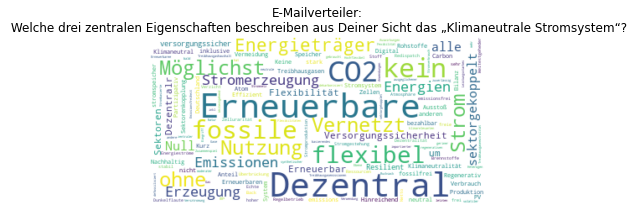

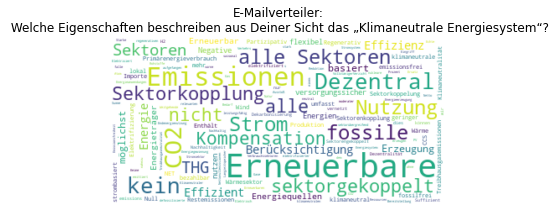

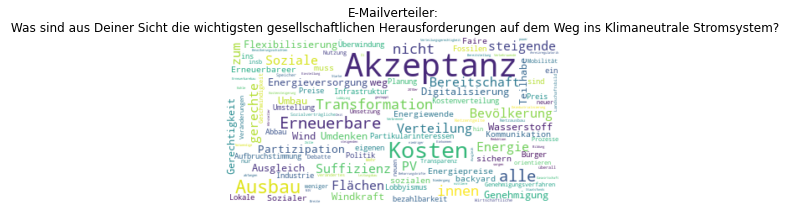

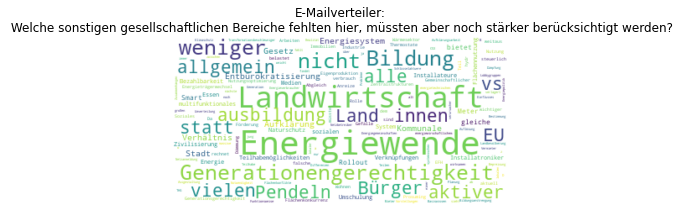

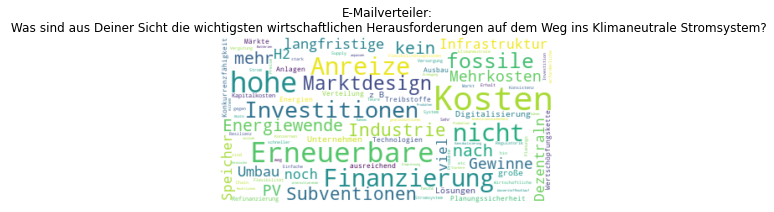

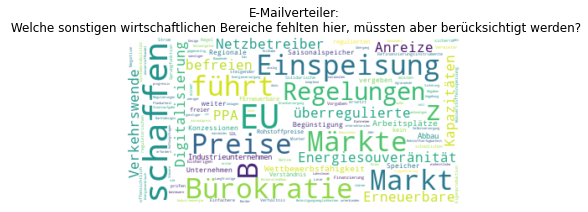

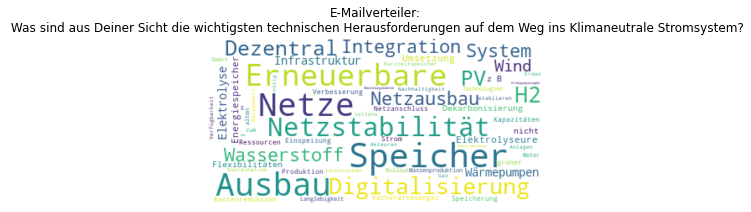

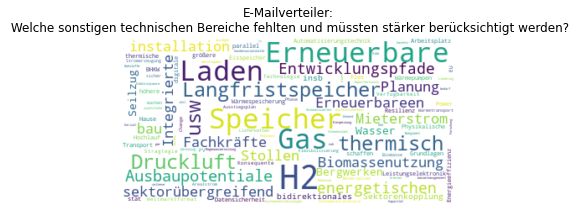

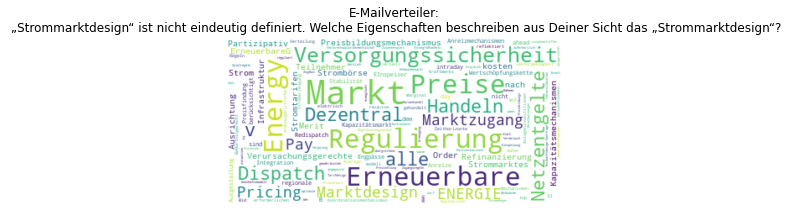

[]

In [15]:
# Erzeuge eine WordCloud für alle Fragen mit drei Antwortmöglichkeiten:
# Umfrageergebnisse hier nur die von der Gruppe "E-Mail-Liste". Keine Priorisierung der Felder (1., 2., 3.)
rls_umfrage_auswertung.create_wordclouds(codebook, data.loc[states[0], links[0]], links[0])

# Teil 1

Beschreibung generell

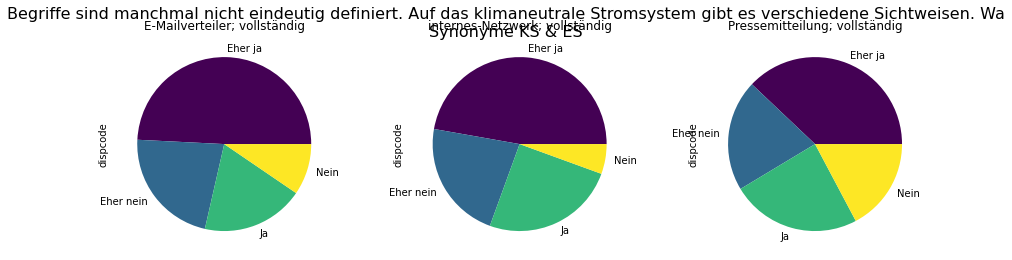

In [16]:
pie_plots(5)

In [17]:
print_data('v_138', list, title=codebook[6]['question'], gap=True)

Was ist der Unterschied zwischen dem „Klimaneutralen Stromsystem“ und „Erneuerbaren Stromsystem“? (q_47506 - Typ 142)

E-Mailverteiler; vollständig: ['- Zum einen ist der Begriff  Erneuerbares Stromsystem  schwierig, weil ja nicht das Stromsystem  erneuerbar  ist, sondern wenn überhaupt die Erzeugungsanlagen im System.  - Fraglich ist für mich auch, ob Verfeuerung von Wasserstoff  erneuerbar  ist  - Außerdem schließt der BEgriff CCS und CCU aus, anders als der Begriff Klimaneutral  - Bei  Erneuerbar  würde ich außerdem interpretieren, das Atomkraft ausgeschlossen ist, während das bei  klimaneutral  nicht umbedingt der Fall sein muss.', 'Erneuerbares stromsystem meint der gesamte Strombedarf kommt aus EE, Klimaneutral meint der strom kommt sonstwoher, auch aus fossilen oder Atom, das dabei ggf. anfallede CO2 wird irgendwo deponiert, nur nicht (sofort) in der Atmosphäre, dito der Atommüll', 'Der Einsatzgrad nuklearer Erzeugungskapazitäten (Fission oder Fusion)', 'rein sprachlich könnte e

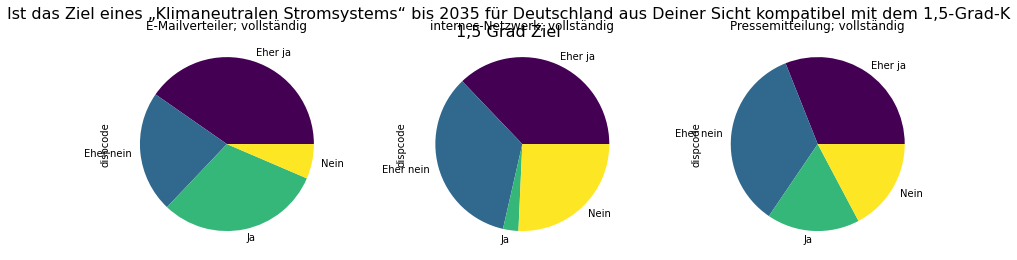

In [18]:
pie_plots(7)

In [19]:
print_data('v_434', list, title=codebook[8]['question'], gap=True)

Warum ist es nicht kompatibel, was fehlt Dir? (q_51785 - Typ 142)

E-Mailverteiler; vollständig: ['Es kommt zu spät.  Nach den bisherigen Erfahrungen lässt sich das Stromsystem deutlich besser vergrünen als die anderen Sektoren.', 'Es geht nicht schnell genug. 2035 muss eigentlich das gesamte ENERGIE-System klimaneutral sein.', 'Für die Einhaltung des 1,5° Zieles müsste der Verbrauch die nächsten Monate und Jahre deutlich sinken, um den verzögerten Ausbau der Erneuerbaren Energien zu kompensieren. Zudem müssen noch die Sektoren Wärme und Verkehr zum großen Teil aus dem erneuerbaren Stromangebot versorgt werden. Die kann auch nur klappen, wenn der Verbrauch auch in diesen Sektoren drastisch sinkt. ', 'das bedarf einer weitgehenden Elektrifizierung  und diese aus 100% EE', 'System kommt zu spät. Restbudget ist damit bereits früher aufgebraucht', 'Was genau heißt hier, Klimaneutral und was passiert in den einzelnen Sektoren?', 'Laut SRU ist zur Erreichung des 1,5 °C Ziels (50 % Wahrschein

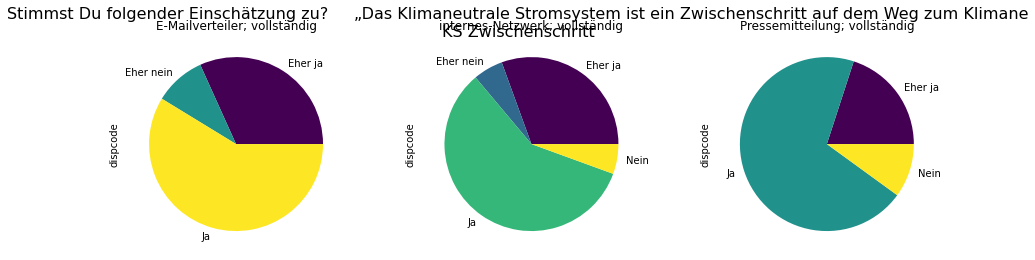

In [20]:
pie_plots(9)

In [21]:
print_data('v_171', list, title=codebook[10]['question'], gap=True)

Wie würdest Du dann das Verhältnis des Klimaneutralen Stromsystems zum Klimaneutralen Energiesystem beschreiben? (q_50620 - Typ 142)

E-Mailverteiler; vollständig: ['klimaneutrales Stromsystem ist eher Augenwischerei im Interesse der Laufzeitverlängerung der fossilen/atomaren Energieversorgung und dient der Ruhigstellung derer, die den Unterschied nicht kennen und / oder glauben, das sei das Selbe.', 'Mehr Gleichzeitigkeit erforderlich, keine Zeit für ein Nacheinander', 'Ein Klimaneutrales Energiesystem verlagert alle Energiebedarfe in das Stromsystem. Dieses muss daher in anderer Weise ausgebaut werden als bei reiner Strombetrachtung. Insbesondere ermöglicht die zunehmende Dezentralität sowohl der Stromerzeugung als auch deren Flexibilität bei der Nutzung (insb. Lastverschiebung von Wärmepumpen und E-Autoladen) neue und sehr viel effizientere (daher auch schnellere) Umsetzung dezentralerer Systemtopologien (inkl. Local Balancing zur Reduktion des Netzausbaubedarfs). Da diese jedoch au

In [22]:
print_data('v_148', np.mean, codebook[12]['subquestion'][1]['question'])

Und nun denken wir an die Zielsysteme: Welchen Strombedarf wird Deutschland haben?  -  Im Klimaneutralen Stromsystem (q_47516 - Typ 911)
E-Mailverteiler; vollständig: 941.0754716981132
internes-Netzwerk; vollständig: 958.0
Pressemitteilung; vollständig: 1124.92


In [23]:
print_data('v_149', np.mean, codebook[12]['subquestion'][2]['question'])

-  Im Klimaneutralen Energiesystem (q_47517 - Typ 911)
E-Mailverteiler; vollständig: 1635.26
internes-Netzwerk; vollständig: 1713.576923076923
Pressemitteilung; vollständig: 2087.3809523809523


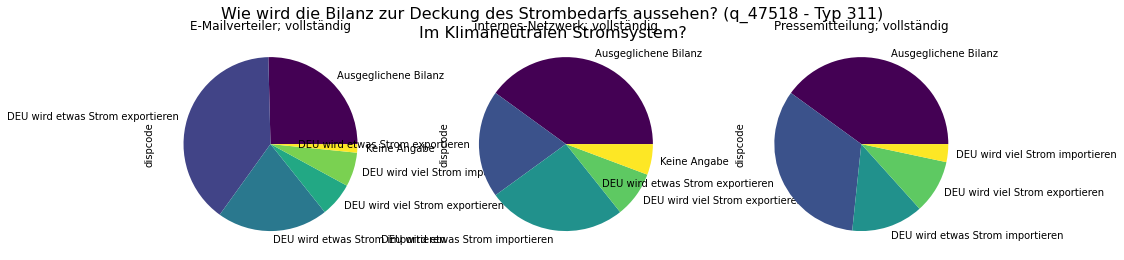

In [24]:
pie_plots(13)

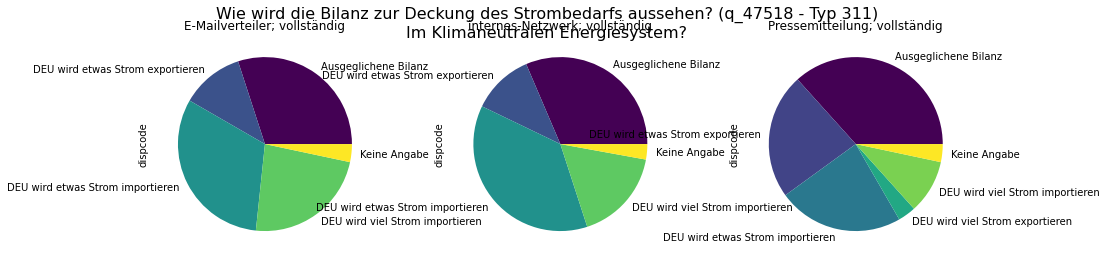

In [25]:
pie_plots(13, sub=2)

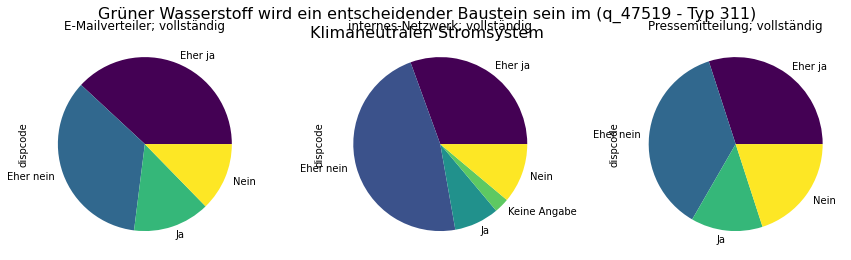

In [26]:
pie_plots(14)

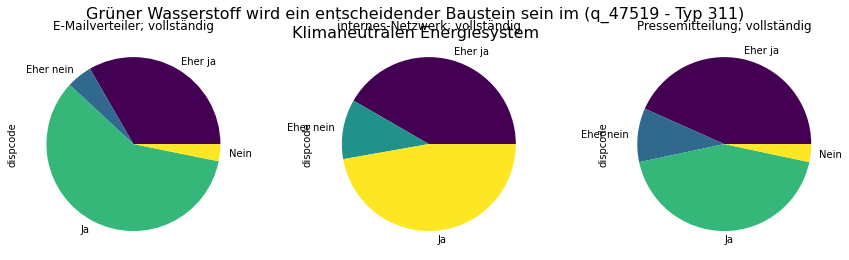

In [27]:
pie_plots(14,sub=2)

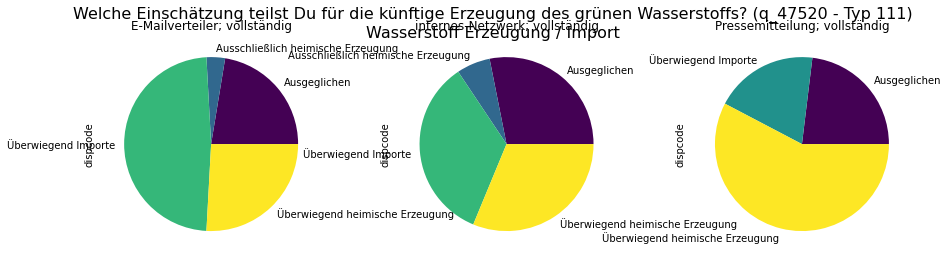

In [28]:
pie_plots(15)

# Teil Gesellschaft

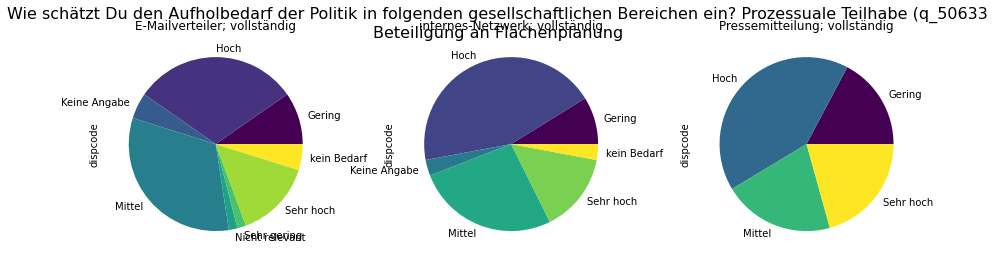

In [29]:
pie_plots(17)

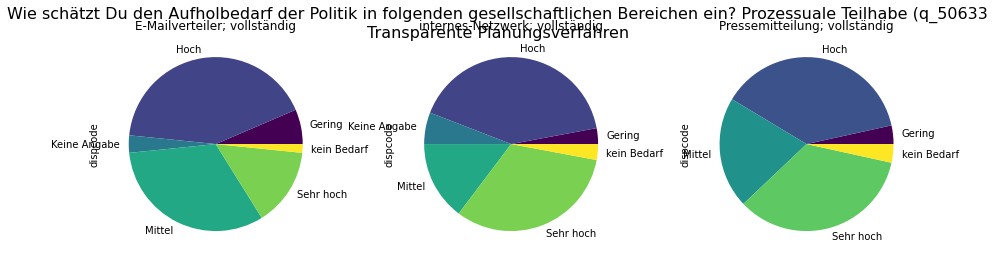

In [30]:
pie_plots(17,sub=2)

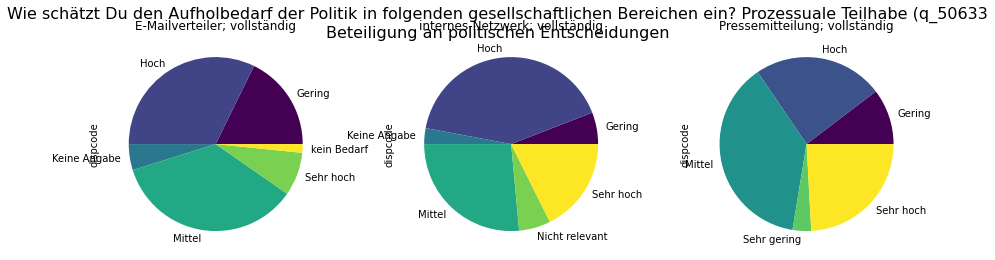

In [31]:
pie_plots(17, sub=3)

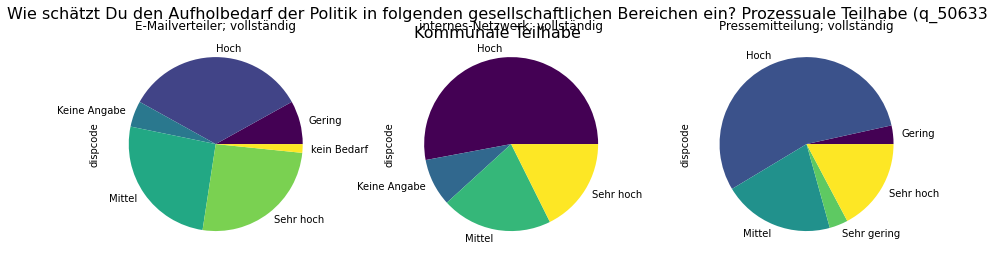

In [32]:
pie_plots(17, sub=4)

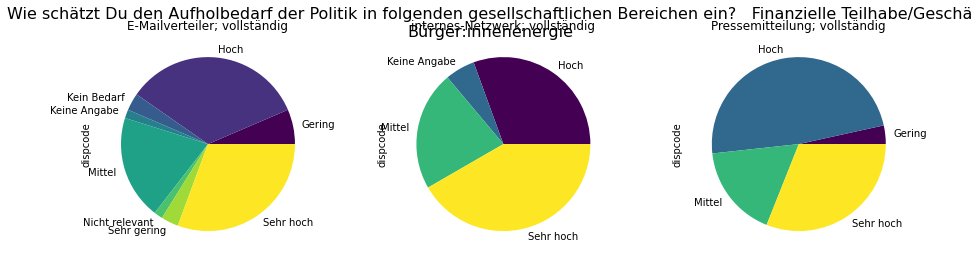

In [33]:
pie_plots(18)

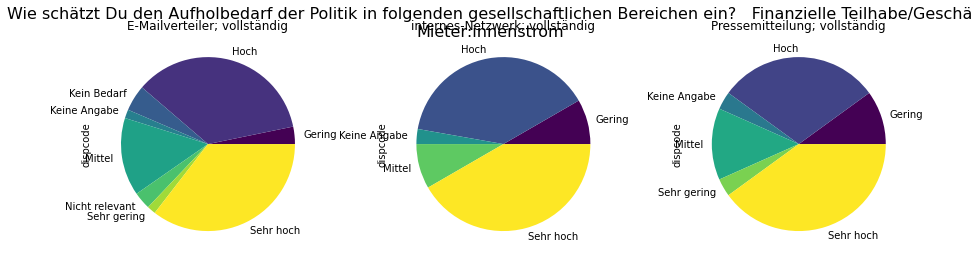

In [34]:
pie_plots(18, sub=2)

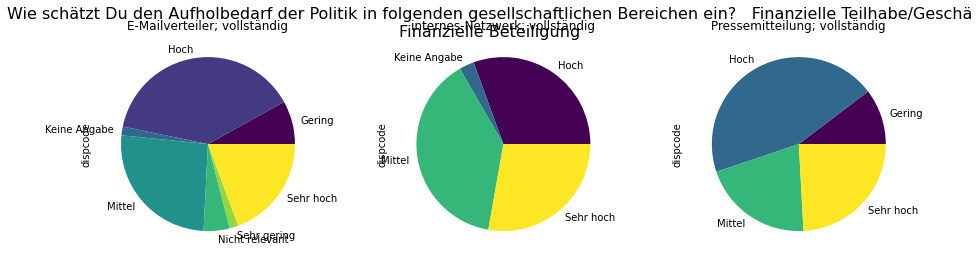

In [35]:
pie_plots(18,sub=3)

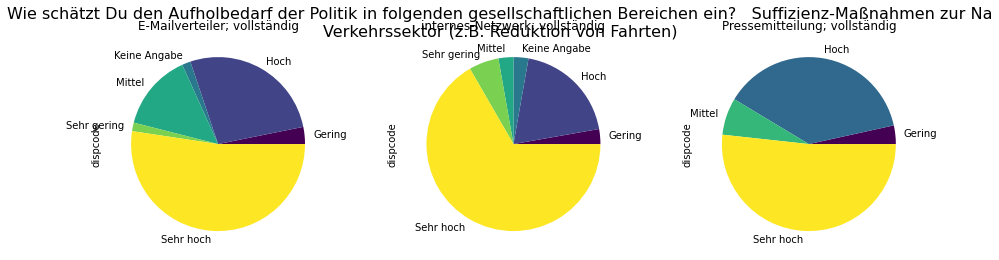

In [36]:
pie_plots(19)

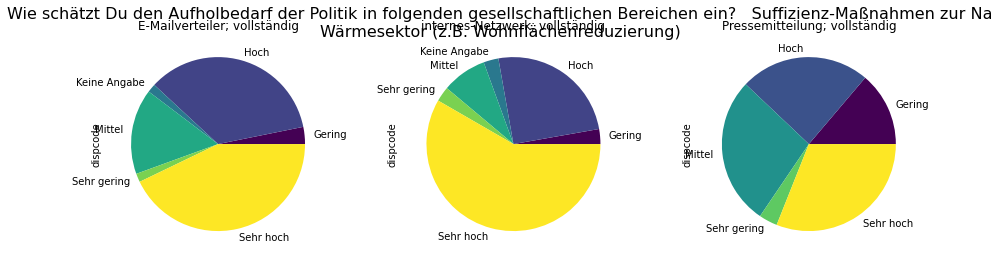

In [37]:
pie_plots(19, sub=2)

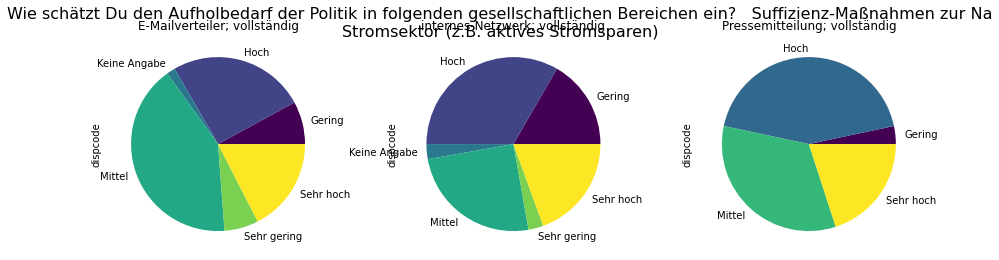

In [38]:
pie_plots(19, sub=3)

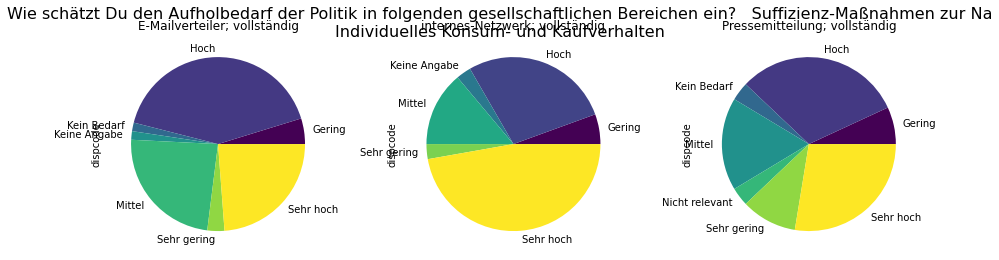

In [39]:
pie_plots(19, sub=4)

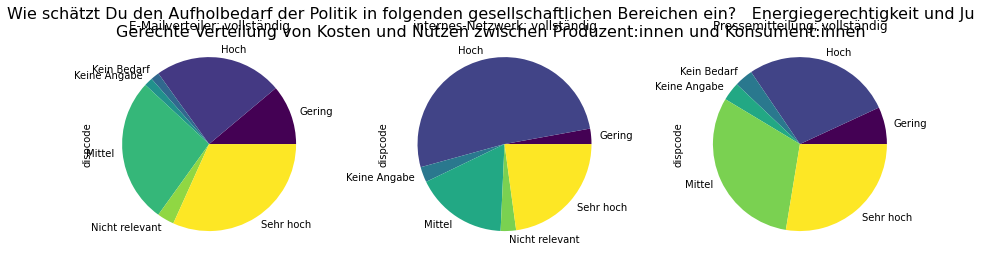

In [40]:
pie_plots(20, sub=1)

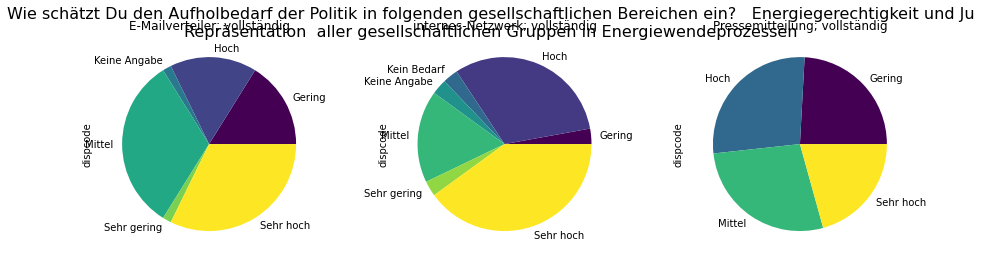

In [41]:
pie_plots(20, sub=2)

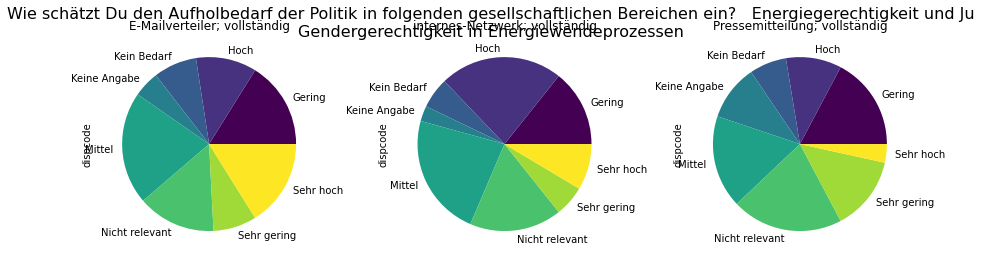

In [42]:
pie_plots(20, sub=3)

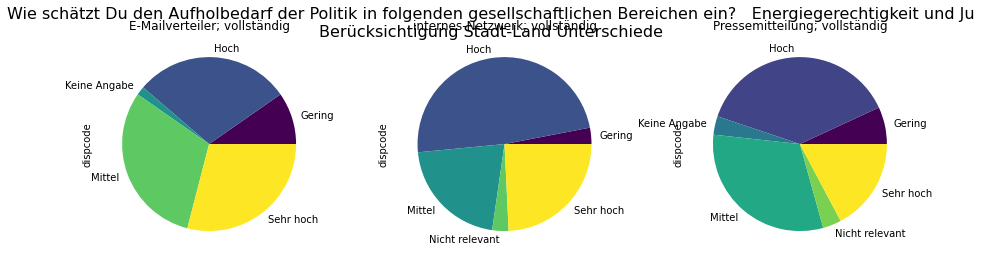

In [43]:
pie_plots(20, sub=4)

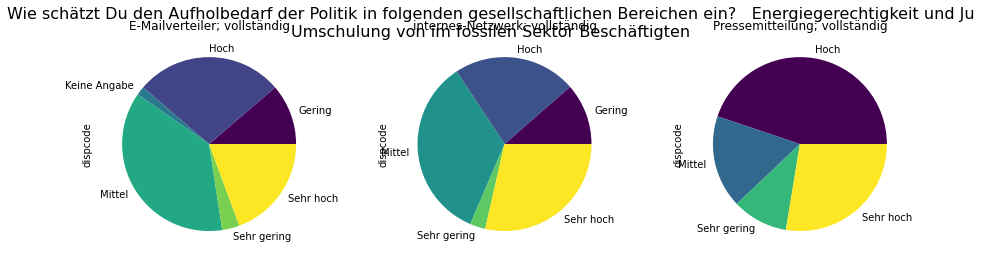

In [44]:
pie_plots(20, sub=5)

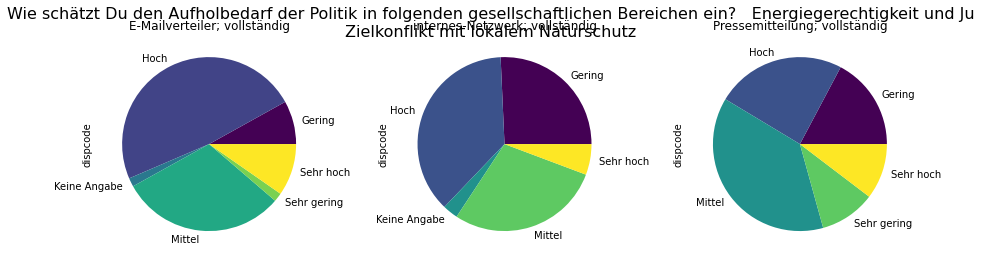

In [45]:
pie_plots(20, sub=6)

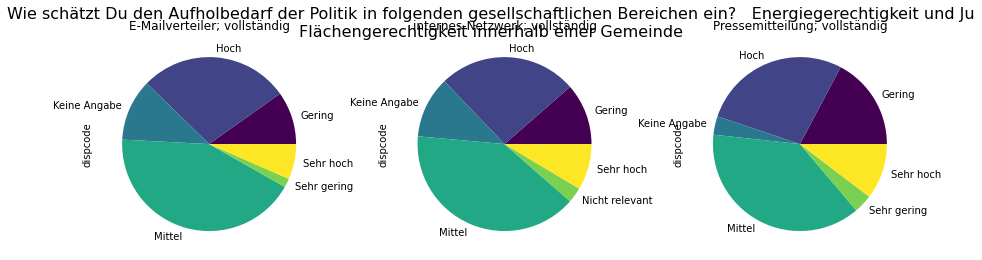

In [46]:
pie_plots(20, sub=7)

# Teil Wirtschaft

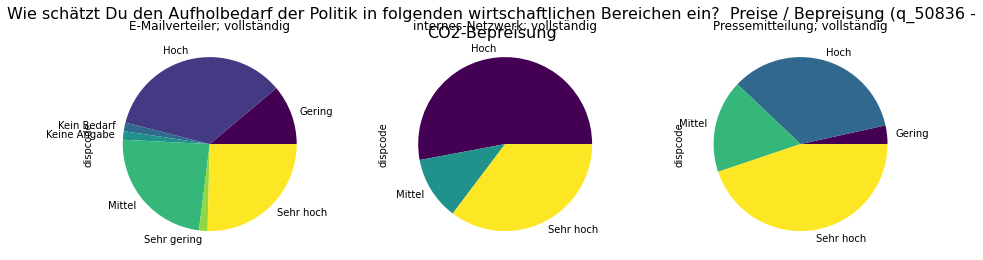

In [47]:
pie_plots(23, sub=1)

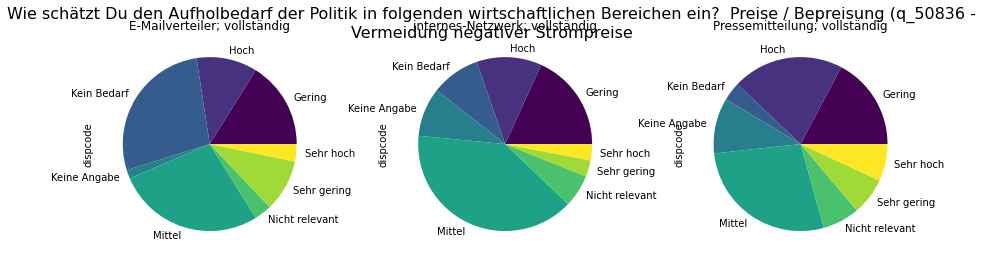

In [48]:
pie_plots(23, sub=2)

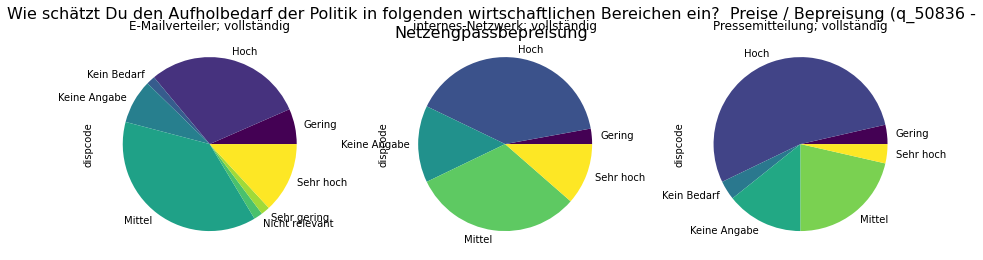

In [49]:
pie_plots(23, sub=3)

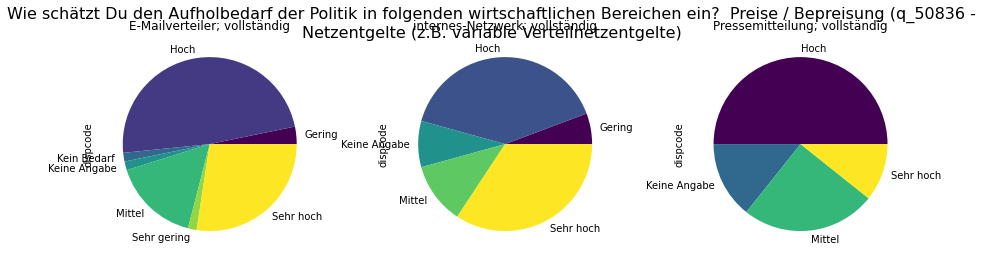

In [50]:
pie_plots(23, sub=4)

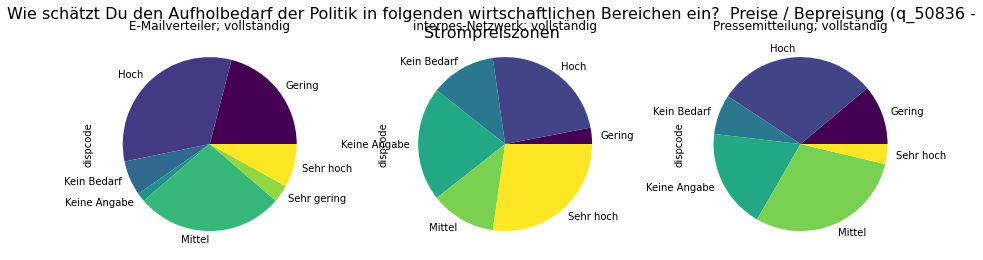

In [51]:
pie_plots(23, sub=5)

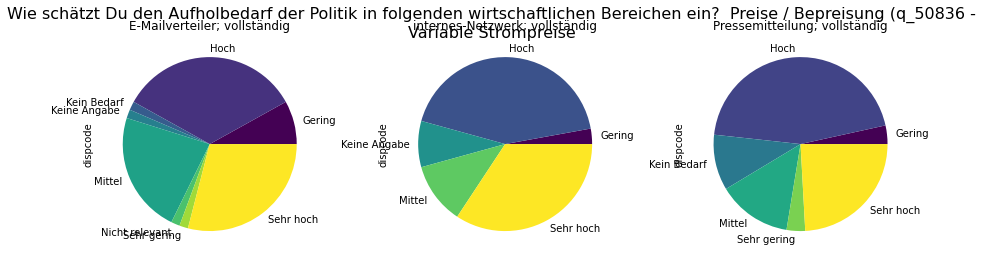

In [52]:
pie_plots(23, sub=6)

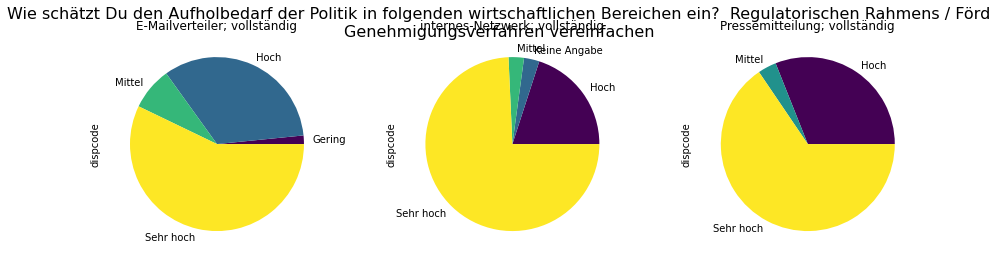

In [53]:
pie_plots(24, sub=1)

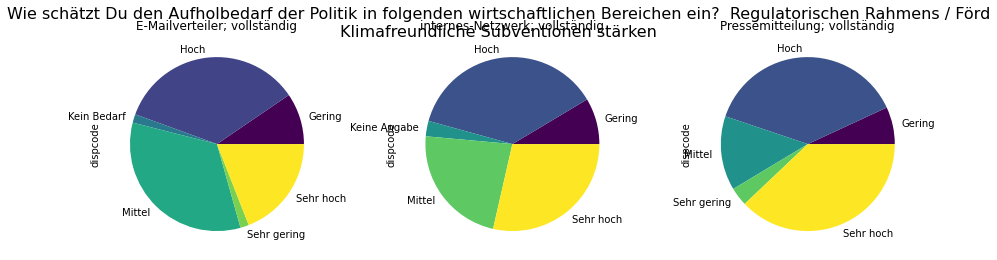

In [54]:
pie_plots(24, sub=2)

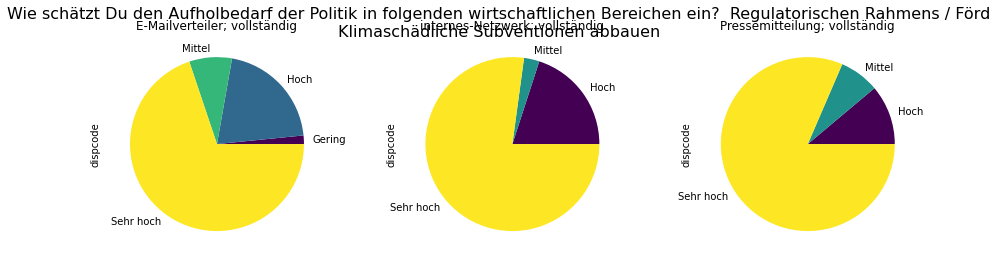

In [55]:
pie_plots(24, sub=3)

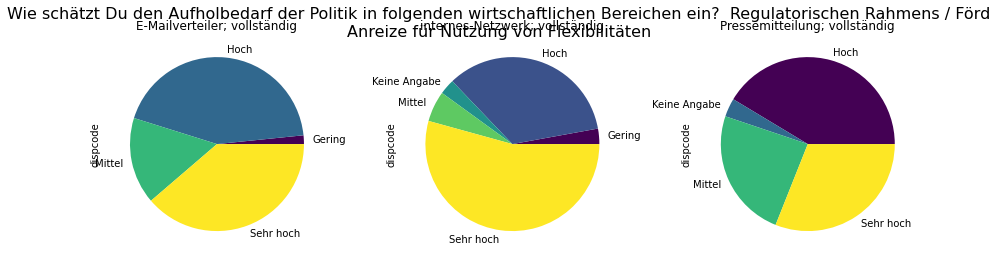

In [56]:
pie_plots(24, sub=4)

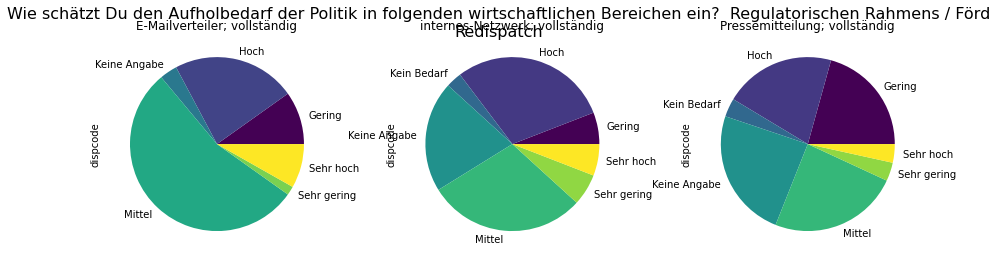

In [57]:
pie_plots(24, sub=5)

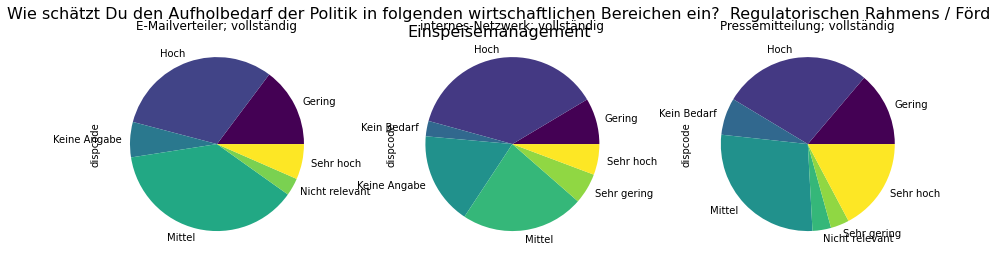

In [58]:
pie_plots(24, sub=6)

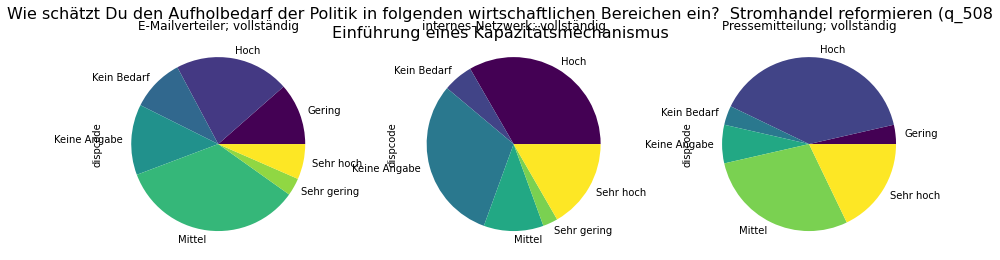

In [59]:
pie_plots(25, sub=1)

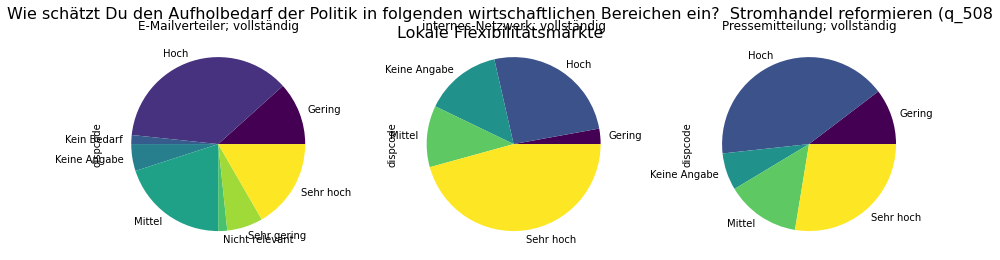

In [60]:
pie_plots(25, sub=2)

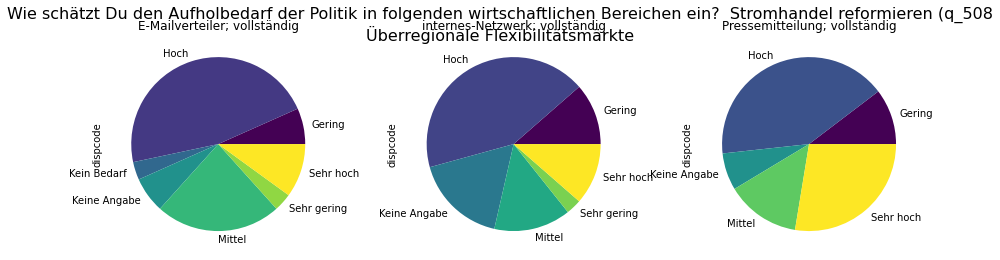

In [61]:
pie_plots(25, sub=3)

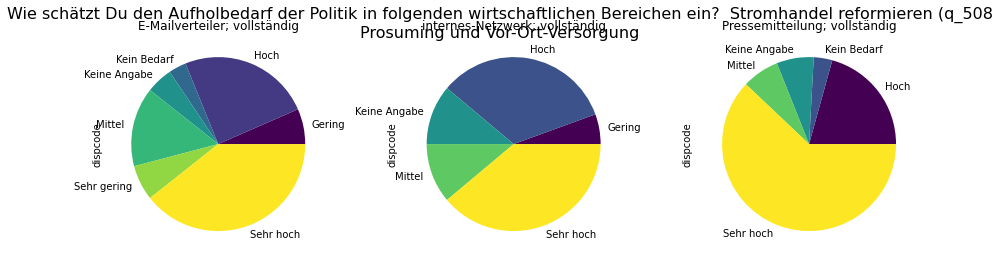

In [62]:
pie_plots(25, sub=4)

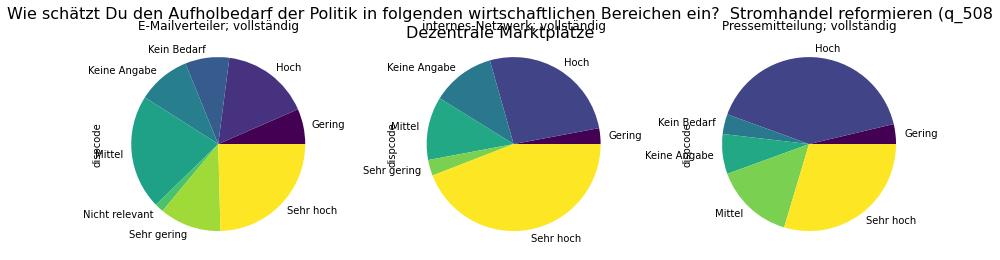

In [63]:
pie_plots(25, sub=5)

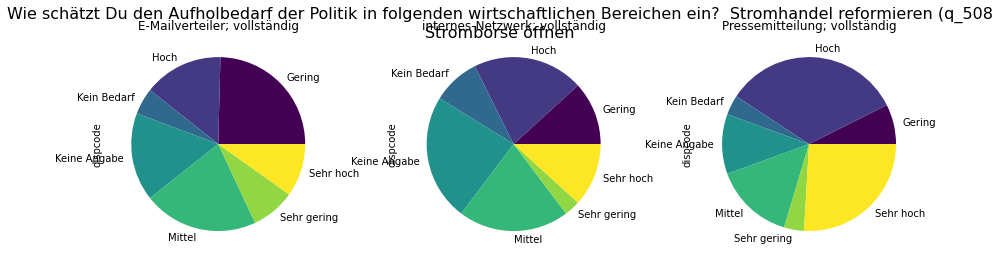

In [64]:
pie_plots(25, sub=6)

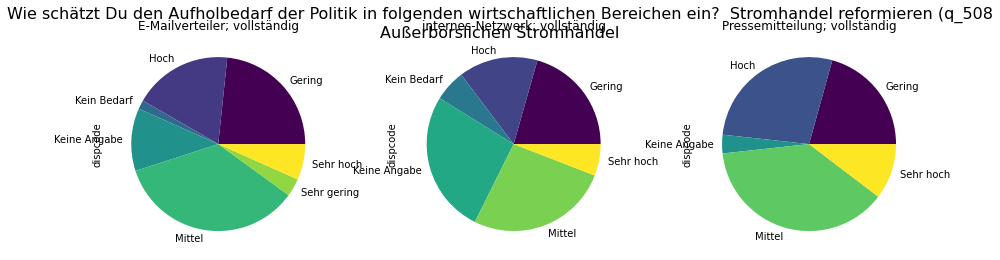

In [65]:
pie_plots(25, sub=7)

# Teil Technik

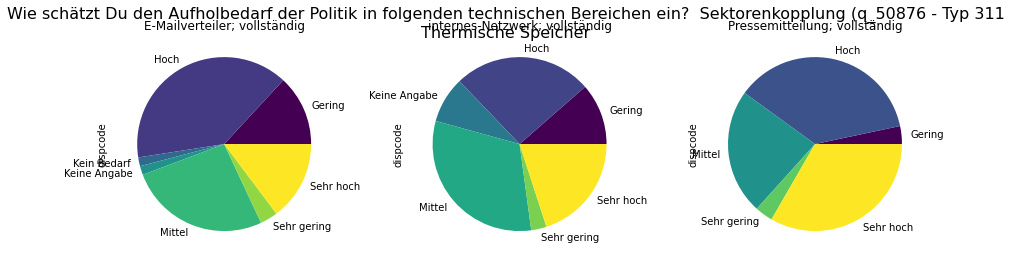

In [66]:
pie_plots(28, sub=1)

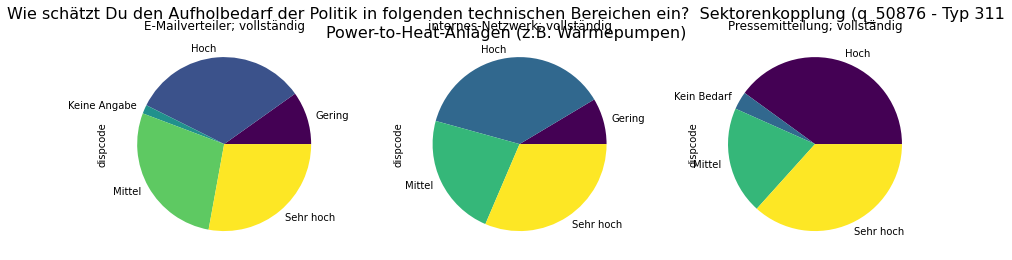

In [67]:
pie_plots(28, sub=2)

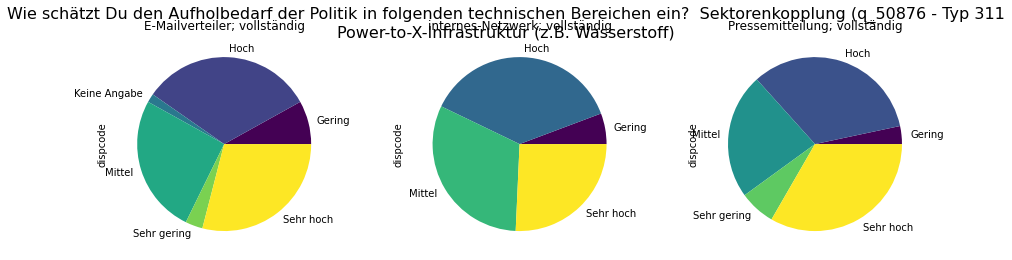

In [68]:
pie_plots(28, sub=3)

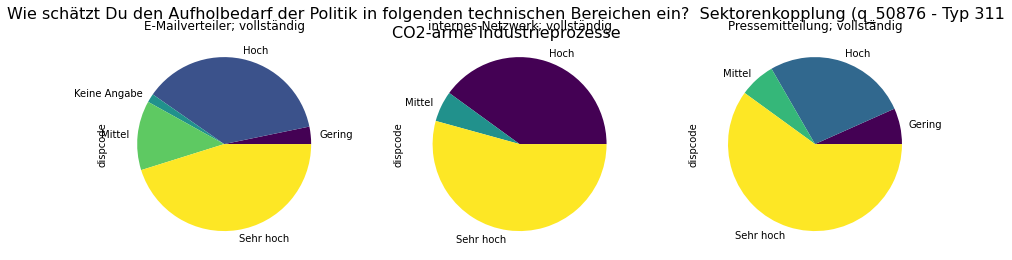

In [69]:
pie_plots(28, sub=4)

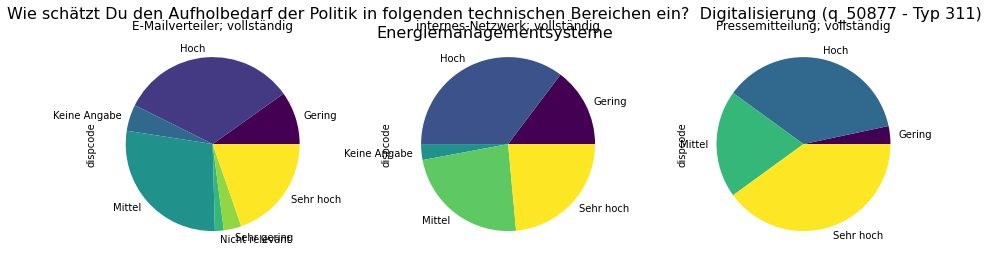

In [70]:
pie_plots(29, sub=1)

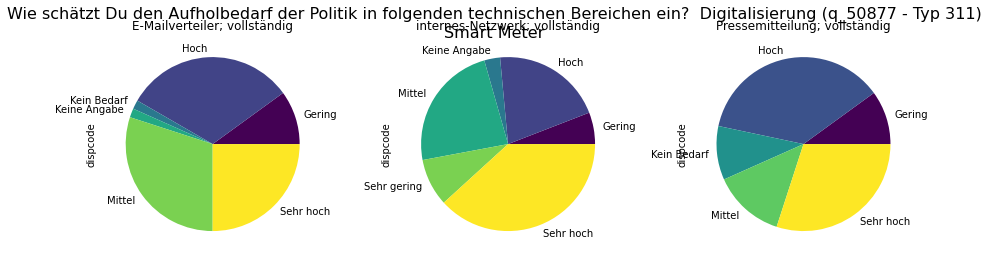

In [71]:
pie_plots(29, sub=2)

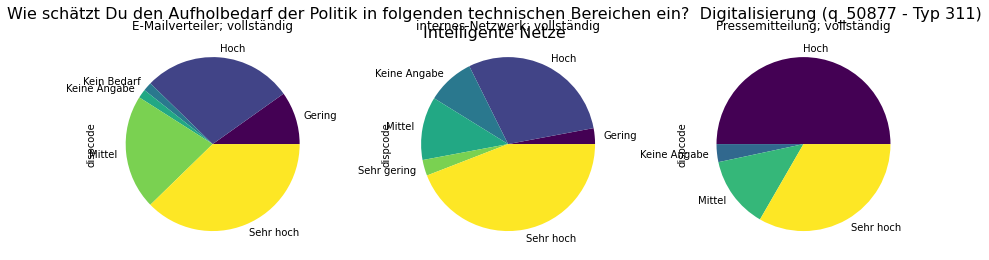

In [72]:
pie_plots(29, sub=3)

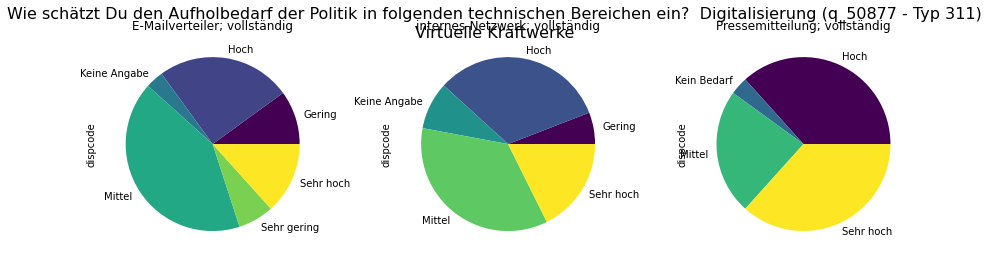

In [73]:
pie_plots(29, sub=4)

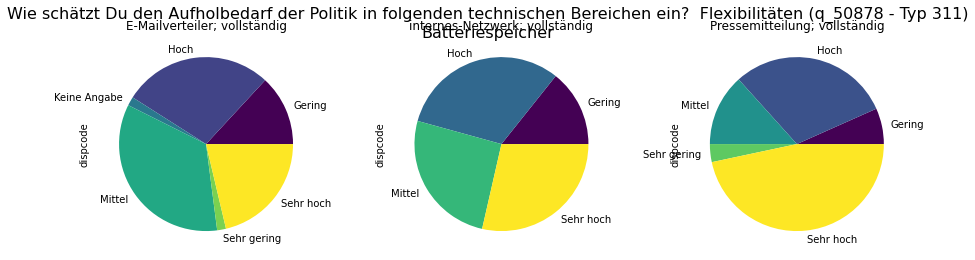

In [74]:
pie_plots(30, sub=1)

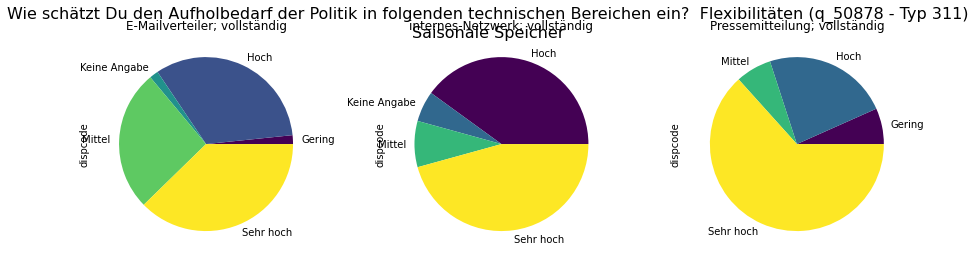

In [75]:
pie_plots(30, sub=2)

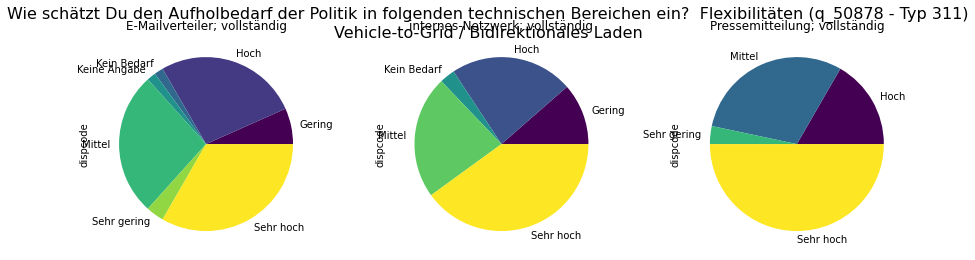

In [76]:
pie_plots(30, sub=3)

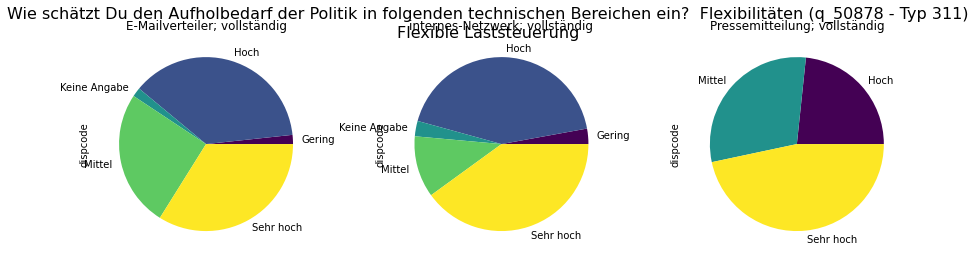

In [77]:
pie_plots(30, sub=4)

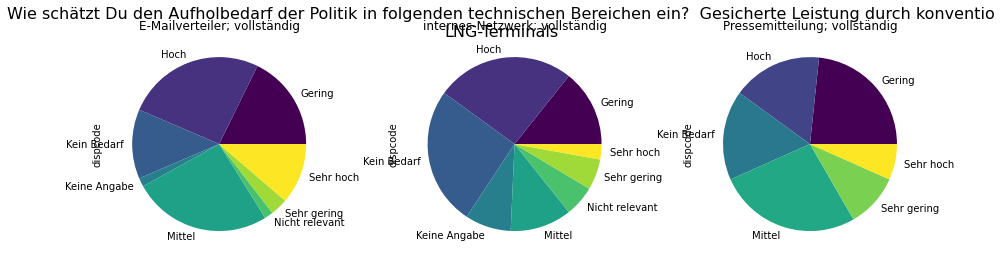

In [78]:
pie_plots(31, sub=1)

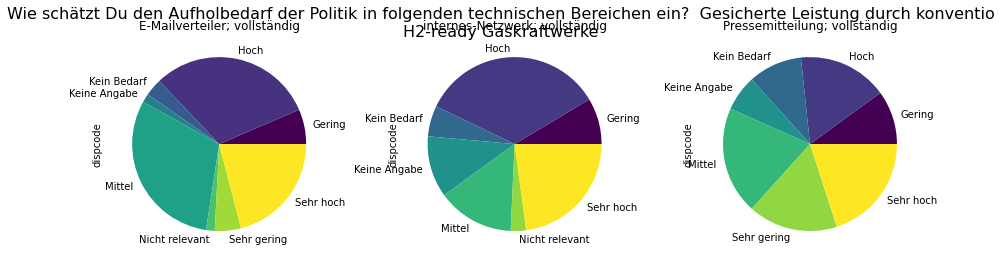

In [79]:
pie_plots(31, sub=2)

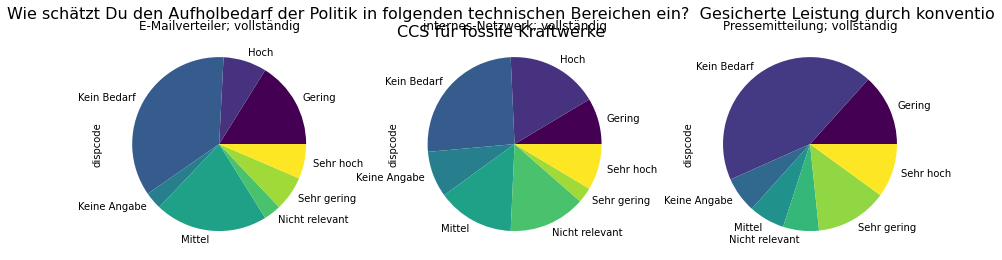

In [80]:
pie_plots(31, sub=3)

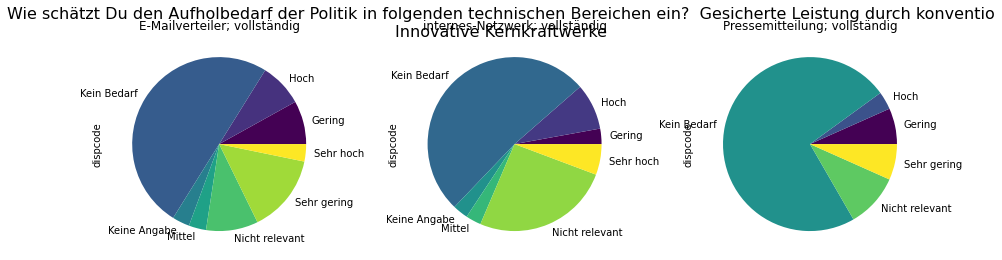

In [81]:
pie_plots(31, sub=4)

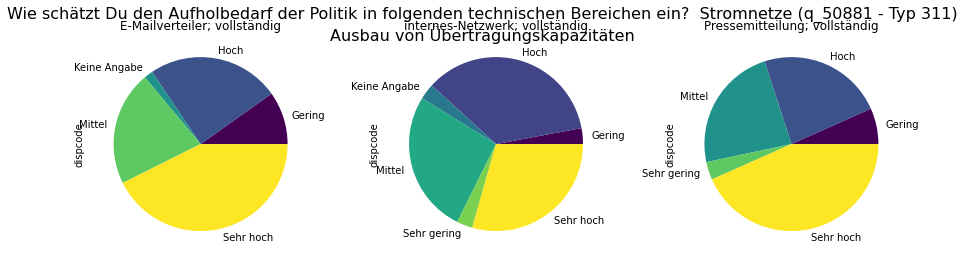

In [82]:
pie_plots(32, sub=1)

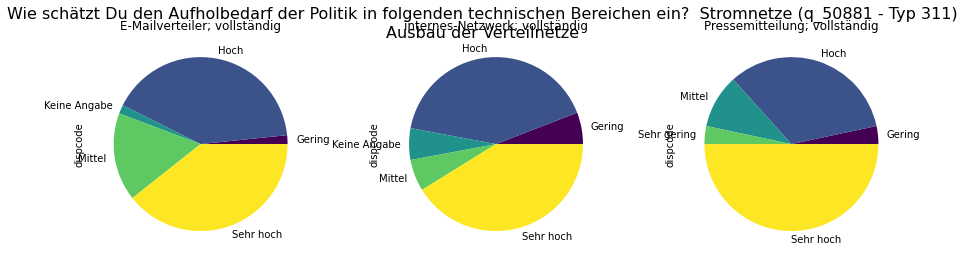

In [83]:
pie_plots(32, sub=2)

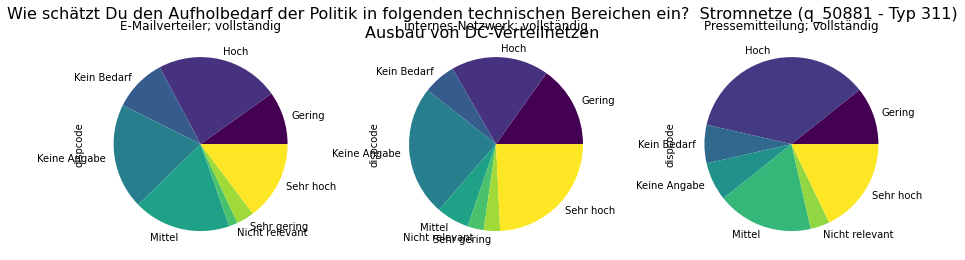

In [84]:
pie_plots(32, sub=3)

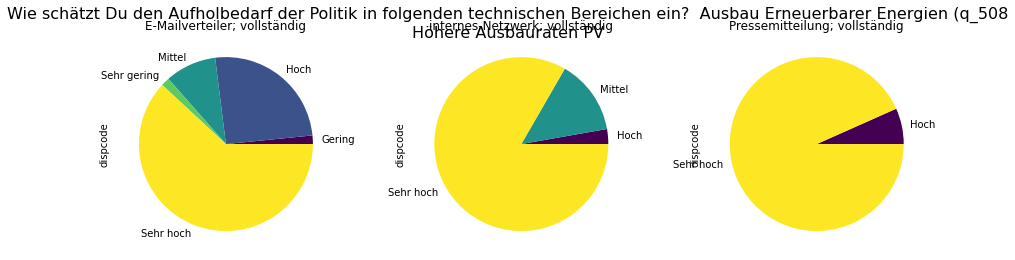

In [85]:
pie_plots(33, sub=1)

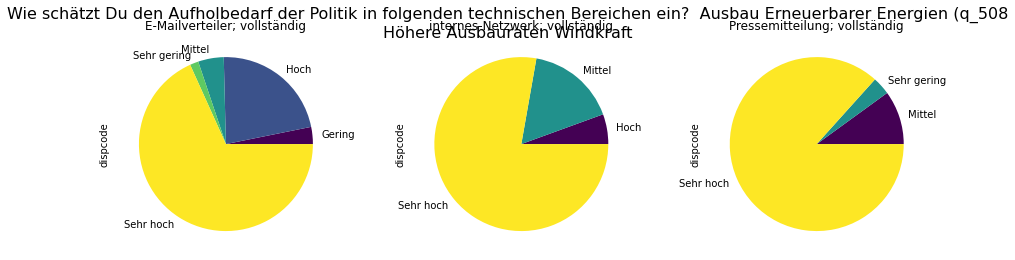

In [86]:
pie_plots(33, sub=2)

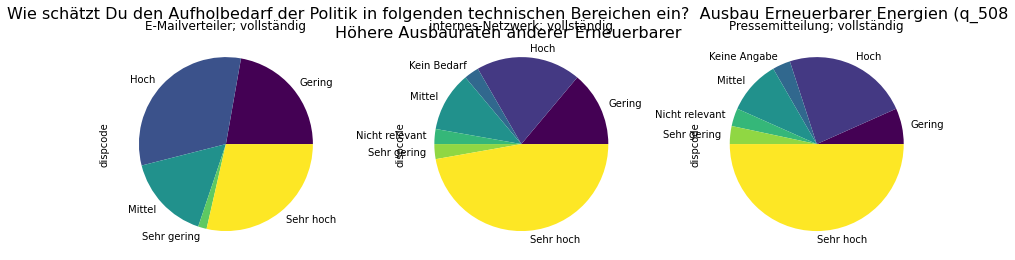

In [87]:
pie_plots(33, sub=3)

# Teil Strommarktdesign

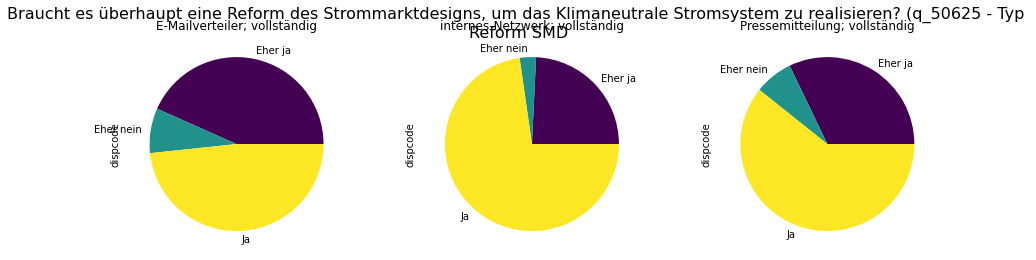

In [88]:
pie_plots(36)

In [89]:
print_data('v_205', list, title=codebook[37]['question'], gap=True)

Welche konkreten Wünsche und Erwartungen hast Du an eine Reform des Strommarktdesigns? (q_50630 - Typ 143)

E-Mailverteiler; vollständig: ['Teilhabe neuer Stakeholder, kleinteiliger Anlagen', 'Die geringen EE-Grenzkosten erfordern einen Leistungspreis (=>Kapazitätsmarkt)', 'Eine Betrachtung, was in integrierten Strukturen günstiger wäre als durch div. Schnittstellen, Fehlerquellen und Ineffizienzen durch die Liberalisierung', 'partizipativ', 'Abkehr von Grenzkosten', 'Anpassungen des aktuellen Ausschreibungsdesigns im EEG', 'grenzkosten null EE tauglich', 'Faire Verteilung der kosten auf Nutzer ', 'größtmögliche Beschleunigung der Energiewende', 'Fokus auf EE und nicht mehr Gas', 'Kurzfristige Engpasssignale (Regionale Flexibilitätsmärkte)', 'Ist Energie Only langfristig Zielführend, wenn die var. Erzeugungskosten längerfristig verschwinden?', 'Übertragungskapazitäten sind im Marktdesign verankert', 'Verknüpfung von technischer Seite (Netze) mit der ökonomischen (Märkte)', 'Flexibilitä

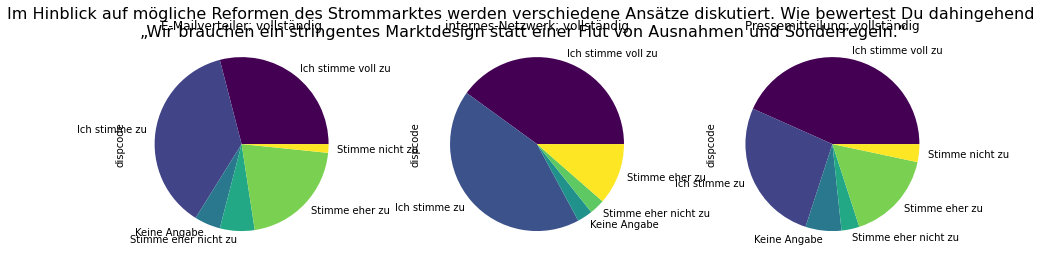

In [90]:
pie_plots(38, sub=1)

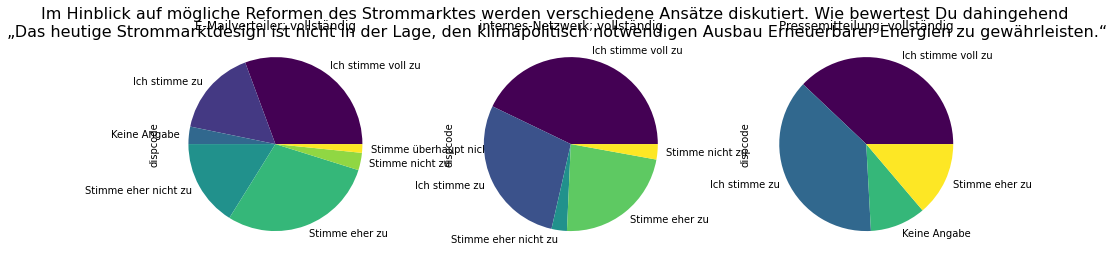

In [91]:
pie_plots(38, sub=2)

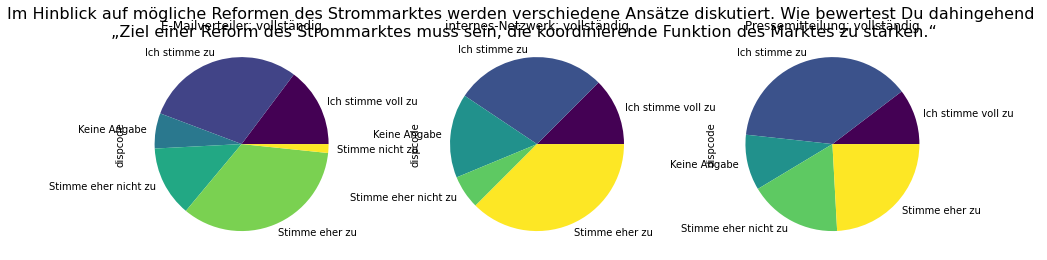

In [92]:
pie_plots(38, sub=3)

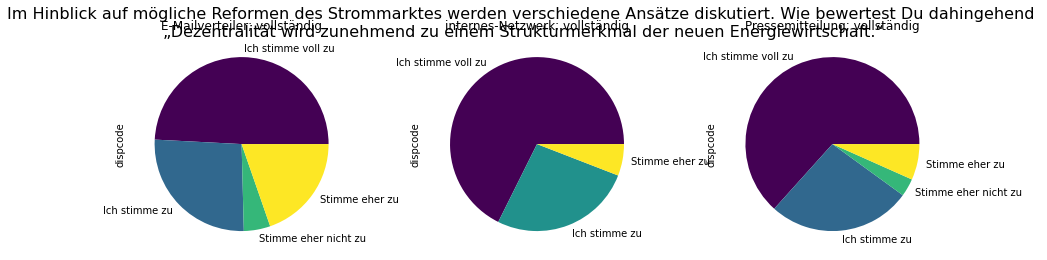

In [93]:
pie_plots(38, sub=4)

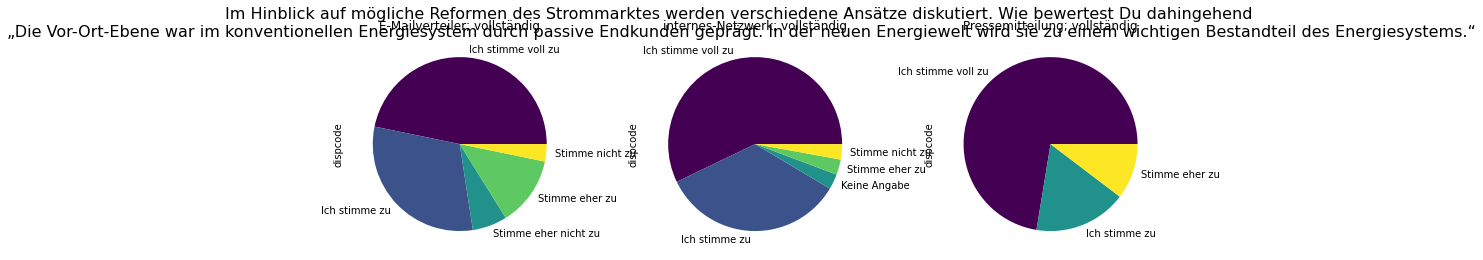

In [94]:
pie_plots(38, sub=5)

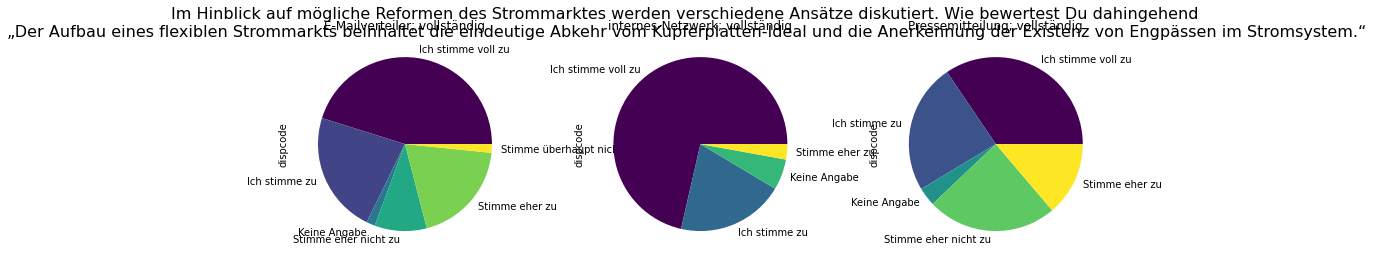

In [95]:
pie_plots(38, sub=6)

In [96]:
print_data('v_273', list, title=codebook[39]['question'], gap=True)

Welche These fehlt Dir, die Du zur Beschreibung der Herausforderung wichtig findest? (q_50665 - Typ 142)

E-Mailverteiler; vollständig: ['Die Illusion der Prosumer wird aufrechtgehalten für und durch eine kleine Gruppe von aktiven, interessierten Kunden - das zukünftige Marktdesign muss sich an den mehr als 90% der Kunden orientieren, denen die Energieversorgung völlig egal ist, solange Kühlschrank, Fernseher und Heizung laufen.  Selbst im gewerblichen Bereich sind die grösste ZAHL der Kunden desinteressiert. Nur energieintensive Betriebe sind aktiv in Flexibilität und KOstensenkungspotentialen.', 'Die Grenzkosten basierte Preisfindung ist einem EE geprägten System keine geeignete Größe zur Preisfindung', 'Das Strommarktdesign wurde bislang oft vom Status Quo schrittweise angepasst und ist aber im Kern nach wie vor auf die Verhältnisse von vor 20 Jahren zu geschnitten. Das neue Strommarktdesign sollte vom Ziel her konzipiert sein und für die Stromversorgung in 20 Jahren die Richtigen B